<a href="https://colab.research.google.com/github/BrunoLoducca/Machine-Learning---Dados-com-Altas-Dimens-es/blob/main/Clustering_Extraindo_Padr%C3%B5es_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

uri = "https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv"

dados_raw = pd.read_csv(uri)


a_renomear = {"CUST_ID": "CONSUMIDOR_ID", 
              "BALANCE": "BALANCO", 
              "BALANCE_FREQUENCY": "FREQUENCIA_DE_BALANCO", 
              "PURCHASES": "COMPRAS", 
              "ONEOFF_PURCHASES": "COMPRA_A_VISTA", 
              "INSTALLMENTS_PURCHASES": "PARCELAS_DE_COMPRAS", 
              "CASH_ADVANCE": "ADIANTAMENTO_DE_DINHEIRO", 
              "PURCHASES_FREQUENCY": "FREQUENCIA_DE_COMPRAS", 
              "ONEOFF_PURCHASES_FREQUENCY": "FREQUENCIA_DE_COMPRAS_A_VISTA", 
              "PURCHASES_INSTALLMENTS_FREQUENCY":"FREQUENCIA_DE_PARCELAS_DE_COMPRAS", 
              "CASH_ADVANCE_FREQUENCY":"FREQUENCIA_DE_ADIANTAMENTO_DE_DINHEIRO", 
              "CASH_ADVANCE_TRX": "ADIANTAMENTO_DE_DINHEIRO_TRX", 
              "PURCHASES_TRX": "COMPRAS_TRX", 
              "CREDIT_LIMIT": "LIMITE_DE_CREDITO", 
              "PAYMENTS": "PAGAMENTOS", 
              "MINIMUM_PAYMENTS": "PAGAMENTOS_MINIMOS", 
              "PRC_FULL_PAYMENT": "PRC_PAGAMENTO_COMPLETO", 
              "TENURE": "POSSE"}

dados_raw = dados_raw.rename(columns=a_renomear)
dados_raw = dados_raw.drop(columns=["CONSUMIDOR_ID", "POSSE"])
dados_raw.head()

,BALANCO,FREQUENCIA_DE_BALANCO,COMPRAS,COMPRA_A_VISTA,PARCELAS_DE_COMPRAS,ADIANTAMENTO_DE_DINHEIRO,FREQUENCIA_DE_COMPRAS,FREQUENCIA_DE_COMPRAS_A_VISTA,FREQUENCIA_DE_PARCELAS_DE_COMPRAS,FREQUENCIA_DE_ADIANTAMENTO_DE_DINHEIRO,ADIANTAMENTO_DE_DINHEIRO_TRX,COMPRAS_TRX,LIMITE_DE_CREDITO,PAGAMENTOS,PAGAMENTOS_MINIMOS,PRC_PAGAMENTO_COMPLETO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
from pandas.core.dtypes.missing import isna

# Verificando quais são os dados nulos
missing_data = dados_raw.isna().sum()
print(missing_data)

BALANCO                                     0
FREQUENCIA_DE_BALANCO                       0
COMPRAS                                     0
COMPRA_A_VISTA                              0
PARCELAS_DE_COMPRAS                         0
ADIANTAMENTO_DE_DINHEIRO                    0
FREQUENCIA_DE_COMPRAS                       0
FREQUENCIA_DE_COMPRAS_A_VISTA               0
FREQUENCIA_DE_PARCELAS_DE_COMPRAS           0
FREQUENCIA_DE_ADIANTAMENTO_DE_DINHEIRO      0
ADIANTAMENTO_DE_DINHEIRO_TRX                0
COMPRAS_TRX                                 0
LIMITE_DE_CREDITO                           1
PAGAMENTOS                                  0
PAGAMENTOS_MINIMOS                        313
PRC_PAGAMENTO_COMPLETO                      0
dtype: int64


In [ ]:
# Estou substituindo os valores vazios por meio do "fillna", que significa
# preenhcer dados vazios, pela mediana desse label. 
dados_raw = dados_raw.fillna(dados_raw.median())

# Verificando quais são os dados nulos
missing_data = dados_raw.isna().sum()
print(missing_data)

BALANCO                                   0
FREQUENCIA_DE_BALANCO                     0
COMPRAS                                   0
COMPRA_A_VISTA                            0
PARCELAS_DE_COMPRAS                       0
ADIANTAMENTO_DE_DINHEIRO                  0
FREQUENCIA_DE_COMPRAS                     0
FREQUENCIA_DE_COMPRAS_A_VISTA             0
FREQUENCIA_DE_PARCELAS_DE_COMPRAS         0
FREQUENCIA_DE_ADIANTAMENTO_DE_DINHEIRO    0
ADIANTAMENTO_DE_DINHEIRO_TRX              0
COMPRAS_TRX                               0
LIMITE_DE_CREDITO                         0
PAGAMENTOS                                0
PAGAMENTOS_MINIMOS                        0
PRC_PAGAMENTO_COMPLETO                    0
dtype: int64


In [ ]:
from sklearn.preprocessing import Normalizer

# O Normalizer é um normalisador que coloca um intervalo entre 0 e 1 aos dados. 
normalisador = Normalizer()
np_dados_raw = normalisador.fit_transform(dados_raw)

dados = pd.DataFrame(np_dados_raw, columns=dados_raw.keys())
dados.head()

,BALANCO,FREQUENCIA_DE_BALANCO,COMPRAS,COMPRA_A_VISTA,PARCELAS_DE_COMPRAS,ADIANTAMENTO_DE_DINHEIRO,FREQUENCIA_DE_COMPRAS,FREQUENCIA_DE_COMPRAS_A_VISTA,FREQUENCIA_DE_PARCELAS_DE_COMPRAS,FREQUENCIA_DE_ADIANTAMENTO_DE_DINHEIRO,ADIANTAMENTO_DE_DINHEIRO_TRX,COMPRAS_TRX,LIMITE_DE_CREDITO,PAGAMENTOS,PAGAMENTOS_MINIMOS,PRC_PAGAMENTO_COMPLETO
0,0.039356,0.000787,0.091796,0.000000,0.091796,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962221,0.194178,0.134239,0.00000
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376517,0.098404,0.00002
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934207,0.077485,0.078135,0.00000
3,0.208887,0.000080,0.187872,0.187872,0.000000,0.025792,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.939988,0.000000,0.039147,0.00000
4,0.504298,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740060,0.418340,0.150967,0.00000


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

SEED = 5
np.random.seed(SEED)

# É importante instanciar o n_init, pois o KKmeans não é um agrupador deterministico, 
# o que significa que a cada execução, obtêm-se resultados diferentes. 
# n_init = 10 significa que o agrupador KKmeans irá retornar o mesmo valor 10x.
# max_iter=300 significa o número máximo de interações que o algorítimo fará. 
agrupador = KMeans(n_clusters=5, n_init= 10, max_iter=300)
# Aferindo o resultado, que já retorna os labels
labels = agrupador.fit_predict(dados)

from sklearn import metrics

# Chamando o coeficiente de silhuta. 
# os labels atribui cada valor dos dados a um cluster.
silhueta = metrics.silhouette_score(dados, labels, metric="euclidean")
print(silhueta)


0.3645219978094767


In [ ]:
# O resultado acima representa o valor do coeficiente de silhuta
# O coeficiente apresenta resultados entre -1 e 1, sendo resultados
# positivos tidos como bons, considerando que o determinado cluster 
# utilizado é válido. 

In [ ]:
# os labels atribui cada valor dos dados a um cluster
# Um bom dbs situa-se mais perto de 0 possível, quando comparado a um tipo de baseline
dbs = metrics.davies_bouldin_score(dados, labels)
print(dbs)

1.0759608810957069


In [ ]:
# Um bom calinski situa-se sobre o máximo valor possível quando comparado a um tipo de baseline
calinski = metrics.calinski_harabasz_score(dados, labels)
print(calinski)

3431.8011174859953


In [ ]:
# Ok, tenho valores para a silhueta, o dbs e o callinski, mas quão bom são?
# Para isso, eu irei fazer uma comparação relativa, na qual irei mudar a quantidade
# de clusters do meu agrupador, que é o KMeans, como forma de encontrar a melhor
# configuração do KMeans para executar, dessa forma, a clusterização. 
# Para tanto, criarei um método:

def algorítimo_de_agrupamento(n_clusters, dataset):

  np.random.seed(5)

  agrupador = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  labels = agrupador.fit_predict(dataset)

  s = metrics.silhouette_score(dataset, labels, metric="euclidean")
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)

  print("O valor da silhueta é de:", s)
  print("O valor do índice de Davis Bouldin é de:", dbs) 
  print("O valor do índice de Calinski-Harabasz é de:", calinski)

In [ ]:
algorítimo_de_agrupamento(5, dados)

O valor da silhueta é de: 0.3645219978094767
O valor do índice de Davis Bouldin é de: 1.0759608810957069
O valor do índice de Calinski-Harabasz é de: 3431.8011174859953


In [ ]:
random_data = np.random.rand(8950, 16)

algorítimo_de_agrupamento(5, random_data)

O valor da silhueta é de: 0.03959498095879946
O valor do índice de Davis Bouldin é de: 3.485070381515475
O valor do índice de Calinski-Harabasz é de: 302.9317044701063


In [ ]:
# Em comparação com o primeiro, feito por mim, e o segundo, 
# aleatoriezado pelo PC, percebe-se que o primeiro é melhor, 
# o que significa que esse agrupador passa nessa validação

In [ ]:
# Uma outra forma de validar é dividir a fonte de dados numa determinada 
# proporção, passar os valores divididos pelo agrupador e, depois, para os respectivos 
# "validadores matemáticos", no sentido em que, se cada porção ser similar a outra, 
# o agrupador é válido. 

set1, set2, set3 = np.array_split(dados, 3)

algorítimo_de_agrupamento(5, set1)
algorítimo_de_agrupamento(5, set2)
algorítimo_de_agrupamento(5, set3)



O valor da silhueta é de: 0.3688875009118462
O valor do índice de Davis Bouldin é de: 1.0560676486660836
O valor do índice de Calinski-Harabasz é de: 1204.0960326087893
O valor da silhueta é de: 0.35406999696241026
O valor do índice de Davis Bouldin é de: 1.1389554530299946
O valor do índice de Calinski-Harabasz é de: 1194.9454119497243
O valor da silhueta é de: 0.36713104970461446
O valor do índice de Davis Bouldin é de: 1.0991014125845049
O valor do índice de Calinski-Harabasz é de: 1167.5075975296127


In [ ]:
# Os valores são semelhantes, parecidos. Agora posso ir à interpretação. 

<function matplotlib.pyplot.show>

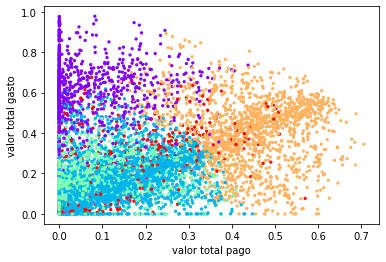

<Figure size 3600x3600 with 0 Axes>

In [ ]:
from matplotlib import figure
import matplotlib.pyplot as plt

plt.scatter(dados["COMPRAS"], dados["PAGAMENTOS"], c=labels, s=5, cmap='rainbow' )
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.figure(figsize=(50,50))
plt.show

In [ ]:
# Como a maneira de compreensão através da visualização gráfica
# não é possível, farei de uma outra forma.
from sklearn.cluster import KMeans

SEED = 5
np.random.seed(SEED)

agrupador = KMeans(n_clusters=5, n_init= 10, max_iter=300)

labels = agrupador.fit_predict(dados)

# Analisando os centroids dos dados, consigo ver valores 
# correspondentes a cada cluster, aqui evidenciado pelo inicio e fim 
# colchetes. Cada coluna presente, representa uma coluna do dataframe. 
# O que procuramos são os valores que possuem uma maior variância em 
# relação ao seu mesmo representante de um outro cluster. Por exemplo, 
# tomando em conta os dois primeiros clusters, nota-se que a primeira coluna
# conta com valores variando da seguinte forma:
# 2.35306625e-01 e 5.04294070e-01, o que indica uma maior variância. 
# Já a segunda coluna, por sua vez:
# 2.16352812e-04 e 2.72242076e-04, indicando uma menor variância. 
centroids = agrupador.cluster_centers_
print(centroids)

[[2.35306625e-01 2.16352812e-04 6.05163989e-02 3.44248410e-02
  2.60967627e-02 3.99956952e-01 5.27259778e-05 2.05044082e-05
  3.52934886e-05 6.54492579e-05 1.57058848e-03 1.12580417e-03
  5.35234813e-01 5.97766487e-01 1.04466914e-01 2.77090123e-05]
 [6.90071773e-02 2.30718554e-04 1.21544417e-01 4.79816606e-02
  7.36630157e-02 2.43125432e-02 1.72915820e-04 3.36789398e-05
  1.40371107e-04 7.91422881e-06 1.23860850e-04 2.86468615e-03
  9.43573334e-01 1.53792838e-01 5.68347988e-02 7.61725600e-05]
 [5.04231090e-01 2.72311689e-04 6.17321425e-02 3.62269020e-02
  2.55269536e-02 2.52702410e-01 6.72689504e-05 2.56975193e-05
  4.50239293e-05 5.74188452e-05 1.15642722e-03 1.33088960e-03
  7.19333925e-01 1.66164378e-01 1.79180227e-01 5.52303554e-07]
 [1.59999628e-01 2.45301618e-04 4.38629300e-01 2.57109259e-01
  1.81691775e-01 2.58728121e-02 2.04397971e-04 8.90423829e-05
  1.50590954e-04 9.39341912e-06 1.69901859e-04 6.17457556e-03
  6.03719056e-01 4.02576568e-01 8.54459126e-02 7.19457109e-05]
 [3.

In [ ]:
max = len(centroids[0])
for i in range(max):
    print(dados.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCO 
0.0224
FREQUENCIA_DE_BALANCO 
0.0000
COMPRAS 
0.0197
COMPRA_A_VISTA 
0.0077
PARCELAS_DE_COMPRAS 
0.0036
ADIANTAMENTO_DE_DINHEIRO 
0.0225
FREQUENCIA_DE_COMPRAS 
0.0000
FREQUENCIA_DE_COMPRAS_A_VISTA 
0.0000
FREQUENCIA_DE_PARCELAS_DE_COMPRAS 
0.0000
FREQUENCIA_DE_ADIANTAMENTO_DE_DINHEIRO 
0.0000
ADIANTAMENTO_DE_DINHEIRO_TRX 
0.0000
COMPRAS_TRX 
0.0000
LIMITE_DE_CREDITO 
0.0360
PAGAMENTOS 
0.0280
PAGAMENTOS_MINIMOS 
0.0543
PRC_PAGAMENTO_COMPLETO 
0.0000


In [ ]:
# Valores usados:
# Balanco, Adiantamento_de_dinheiro, Compras, Limite_de_crédito, Pagamentos

In [ ]:
dados_raw["cluster"] = labels
descricao = dados_raw.groupby("cluster")["BALANCO", "ADIANTAMENTO_DE_DINHEIRO", "COMPRAS", "LIMITE_DE_CREDITO", "PAGAMENTOS"]
n_clientes = descricao.size()
descricao = descricao.mean()
dados["N_CLIENTES"] = n_clientes
print(descricao)



             BALANCO  ADIANTAMENTO_DE_DINHEIRO  ...  LIMITE_DE_CREDITO   PAGAMENTOS
cluster                                         ...                                
0        1796.066730               3267.660346  ...        3981.537441  4710.615663
1         443.746756                141.482978  ...        5130.547795   814.294226
2        3038.132314               1636.114441  ...        4496.336858   968.599396
3        1142.320861                183.376625  ...        4097.306540  3036.763695
4        1987.501586                421.129352  ...        2227.737226  1336.238911

[5 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
# CLUSTER 0: Clientes que gastam pouco.
# CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
# CLUSTER 2: Clientes que gastam muito com compras.
# CLUSTER 3: Clientes que gastam muito com saques.
# CLUSTER 4:

In [ ]:
# CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.
# CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.
# CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.
# CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.
# CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.